<a href="https://colab.research.google.com/github/yunseo4401/start/blob/master/%EB%8B%A4%EC%A4%91_%ED%9A%8C%EA%B7%80__%2B%EB%A6%BF%EC%A7%80_%EA%B7%9C%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from sklearn.datasets import load_diabetes
import pandas as pd

diabetes=load_diabetes()
x=pd.DataFrame(diabetes.data,columns=diabetes.feature_names)
y=diabetes.target

In [3]:
from sklearn.model_selection import train_test_split 
train_input,test_input,train_target,test_target=train_test_split(x,y,test_size=0.3,random_state=1)

print(train_input.shape,train_target.shape)
print(test_input.shape,test_target.shape)

(309, 10) (309,)
(133, 10) (133,)


In [4]:
from sklearn.preprocessing import StandardScaler

ss=StandardScaler()
ss.fit(train_input)

train_scaled=ss.transform(train_input)
test_scaled=ss.transform(test_input)

In [5]:
from sklearn.linear_model import Ridge  #릿지 회귀 import
ridge=Ridge() #알파값 디폴트 1
ridge.fit(train_scaled,train_target)
print(ridge.score(train_scaled,train_target))

0.5416025957852131


In [6]:
print(ridge.score(test_scaled,test_target))

0.4371580945873186


In [13]:
#적절한 알파값을 찾기 위해 결정계수 그래프를 그려보자 
import matplotlib.pyplot as plt
train_score=[]
test_score=[] #알파값 바꿀때마다 score()매서드의 결과를 저장할 리스트 생성 

alpha_list=[1,10,100,500,1000,100000]
for alpha in alpha_list:
  ridge=Ridge(alpha=alpha)
  ridge.fit(train_scaled,train_target)
  train_score.append(ridge.score(train_scaled,train_target))
  test_score.append(ridge.score(test_scaled,test_target))

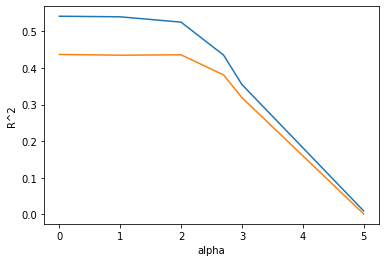

In [14]:
import numpy as np
plt.plot(np.log10(alpha_list),train_score)
plt.plot(np.log10(alpha_list),test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()
#알파리스트에 있는 6개의 값을 동일한 간격으로 나타내기 위해 로그 함수로 바꾸어 지수로 표현 
#100일때 두 그래프가 그나마 가장 가깝고 테스트 점수가 높다 

In [15]:
ridge=Ridge(alpha=100)
ridge.fit(train_scaled,train_target)

print(ridge.score(train_scaled,train_target))
print(ridge.score(test_scaled,test_target))
#음 근데 별로 완화가..?

0.5254688480904277
0.4361814911395614
